# **Strategic Insights Venture into a new Cellphone Market**

## Objective
* To deliver comprehensive insights into the mobile phone industry, enabling the business to identify key competitors and understand user preferences.

* Additionally, to analyze and validate the sentiments expressed in user reviews to inform strategic decision-making.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df_phonedata = pd.read_csv('/content/drive/MyDrive/Caption Project/Web_and_social_media_analytics/Cell_Phones_and_Accessories_5.csv')

<ipython-input-3-86ee5d4ecd87>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_phonedata = pd.read_csv('/content/drive/MyDrive/Caption Project/Web_and_social_media_analytics/Cell_Phones_and_Accessories_5.csv')


In [4]:
df_phonedata

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
1128432,4.0,True,A1QWMCG1FNEP3A,B01HJC7N4C,NaN,Amazon Customer,Good for viewing. But doesn't have a button or...,Good,1482364800,NaN,NaN,POSITIVE
1128433,5.0,False,A3FOBEJ9UVUTR3,B01HJC7N4C,NaN,David Harlow,I was given the Rockrok 3D VR Glasses Headset ...,THE FUTURE IS NOW!!!!!!!,1468540800,NaN,NaN,POSITIVE
1128434,5.0,False,AMUEAMKB4E33M,B01HJC7N4C,NaN,Tom D,Super Fun! The RockRoc 3d vr headset is waaaay...,Get more out of your smartphone .......,1468454400,NaN,['https://images-na.ssl-images-amazon.com/imag...,POSITIVE
1128435,5.0,False,A2EV91MMOJ3IL4,B01HJC7N4C,NaN,Timber12,Love it!\n\nI've had other VR glasses which al...,Join the VR fun train!,1468368000,NaN,NaN,POSITIVE


In [5]:
# Reading the meta data
# importing libraries

import gzip
import shutil

# Path to the meta data zip file.
path1 = '/content/drive/MyDrive/Caption Project/Web_and_social_media_analytics/meta_Cell_Phones_and_Accessories.json.gz'

# Path to meta data .json file
path2 = '/content/drive/My Drive/Caption Project/meta_Cell_Phones_and_Accessories123.json'

# Unzipping the meta data file
with gzip.open(path1, 'rb') as f_in:
     with open(path2, 'wb') as f_out:
         shutil.copyfileobj(f_in, f_out)

In [6]:

# Reading the unzipped meta data into a Python list. The result will be a list of dictionaries.
import json

# Empty list to store the dictonaries
phonemetadata = []

# Reading the dictionaries in the json file and appending it to the list phonemetadata[]
with open(path2, 'r') as f:
     for line in f:
         phonemetadata.append(json.loads(line))

In [7]:
# converting the list phonemetadata into a data frame
df_meta = pd.DataFrame(phonemetadata)

In [8]:
df_meta.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin
0,"[Cell Phones & Accessories, Accessories, Scree...",,[],,Trollies Sing a Long Party VHS,[],[],,,[],"557,379 in Movies & TV (",[],{'ASIN: ': '6303195164'},Movies & TV,,,,6303195164
1,"[Cell Phones & Accessories, Accessories, Car A...",,[],,La Pura VHS,[],[],,Maribel Guardia,[],"1,024,449 in Movies & TV (",[],{'ASIN: ': '630524412X'},Movies & TV,,,,630524412X
2,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[New items to give you a new good mood, welcom...",,Leopard Thanksgiving Easter PC Black Case for ...,[],[],,,[],"5,315,017 in Books (",[],"{'Publisher:': 'juduiou', 'ASIN:': '6310200240...",Books,,,,6310200240
3,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,Puppies Faceplate Hard Case Protector for Net1...,[],[],,Live2Pedal,[Protect your phone with style through this At...,"[>#6,368,825 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501710
4,"[Cell Phones & Accessories, Cases, Holsters & ...",,"[A brand-new, unused, unopened, undamaged item...",,White Wolf Faceplate Protector Hard Case for S...,[],[],,wirelessoutletusa,[Protect your phone with style through this At...,"[>#2,672,454 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,6786501273


In [9]:
df_meta.shape

(590071, 18)

In [10]:
# need only cellphone 'category'
df_meta["new_category"] = [l[1] if len(l) > 0 else np.nan for l in df_meta["category"]]

In [11]:
df_meta["new_category"].value_counts()

,count
new_category,
"Cases, Holsters & Sleeves",332570
Accessories,190950
Cell Phones,9823
SIM Cards & Prepaid Minutes,1057
Mobile Broadband,65
Featured Categories,1


In [12]:
cellphone_data = df_meta[df_meta["new_category"] == "Cell Phones"]

In [13]:
cellphone_data["new_category"].value_counts()

,count
new_category,
Cell Phones,9823


## **Data pre-processing**

In [14]:
df_phonedata.head()

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,POSITIVE


In [15]:
# checking df shape
df_phonedata.shape

(1128437, 12)

In [16]:
# info of the dataset
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 12 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   overall           1128437 non-null  float64
 1   verified          1128437 non-null  bool   
 2   reviewerID        1128437 non-null  object 
 3   asin              1128437 non-null  object 
 4   style             605241 non-null   object 
 5   reviewerName      1128235 non-null  object 
 6   reviewText        1127607 non-null  object 
 7   summary           1127898 non-null  object 
 8   unixReviewTime    1128437 non-null  int64  
 9   vote              92034 non-null    object 
 10  image             27107 non-null    object 
 11  review_sentiment  1128437 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 95.8+ MB


In [17]:
# numerical feature description of df
df_phonedata.describe()

,overall,unixReviewTime
count,1.128437e+06,1.128437e+06
mean,4.221383e+00,1.440400e+09
std,1.231917e+00,4.569215e+07
min,1.000000e+00,1.035331e+09
25%,4.000000e+00,1.416355e+09
50%,5.000000e+00,1.444349e+09
75%,5.000000e+00,1.470442e+09
max,5.000000e+00,1.538438e+09


In [18]:
# counting different types of asin values
len(df_phonedata['asin'].value_counts())

48186

In [19]:
# null values in percentage
def null_values(df):
  nulls =  pd.DataFrame(columns= ["features","percentage"])
  for col in df.columns:
    if df[col].isna().values.any():
      percentage = round(df[col].isna().sum()/len(df.index)*100,2)
      nulls.loc[len(nulls)]={"features": col,"percentage": percentage}
  return nulls

In [20]:
null_values(df_phonedata)

,features,percentage
0,style,46.36
1,reviewerName,0.02
2,reviewText,0.07
3,summary,0.05
4,vote,91.84
5,image,97.60


In [21]:
# We will convert null values of vote columns to zero
df_phonedata['vote'] = df_phonedata['vote'].fillna(0)

In [22]:
df_phonedata

,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,0,NaN,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,0,NaN,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,0,NaN,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,0,NaN,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,0,NaN,POSITIVE
...,...,...,...,...,...,...,...,...,...,...,...,...
1128432,4.0,True,A1QWMCG1FNEP3A,B01HJC7N4C,NaN,Amazon Customer,Good for viewing. But doesn't have a button or...,Good,1482364800,0,NaN,POSITIVE
1128433,5.0,False,A3FOBEJ9UVUTR3,B01HJC7N4C,NaN,David Harlow,I was given the Rockrok 3D VR Glasses Headset ...,THE FUTURE IS NOW!!!!!!!,1468540800,0,NaN,POSITIVE
1128434,5.0,False,AMUEAMKB4E33M,B01HJC7N4C,NaN,Tom D,Super Fun! The RockRoc 3d vr headset is waaaay...,Get more out of your smartphone .......,1468454400,0,['https://images-na.ssl-images-amazon.com/imag...,POSITIVE
1128435,5.0,False,A2EV91MMOJ3IL4,B01HJC7N4C,NaN,Timber12,Love it!\n\nI've had other VR glasses which al...,Join the VR fun train!,1468368000,0,NaN,POSITIVE


In [23]:
# Droping the style and image columns
df_phonedata.drop(['style','image'],axis=1,inplace=True)

"reviewText" is a neccesary column to sentiment anaylsis, hence we are removing the rows with null values

In [24]:
# Removing the null values from reviewText
df_phonedata.dropna(subset=['reviewText'],inplace=True)

In [25]:
# converting unixReview time into date time format
df_phonedata['unixReviewTime']= pd.to_datetime(df_phonedata['unixReviewTime'],unit='s')

A Unix timestamp is basically a way of tracking time by counting the seconds since January 1, 1970. It's used in computing to record specific points in time.

In [26]:
df_phonedata.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment
0,5.0,True,A24E3SXTC62LJI,7508492919,Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,2014-08-04,0,POSITIVE
1,5.0,True,A269FLZCB4GIPV,7508492919,sarah ponce,When you don't want to spend a whole lot of ca...,1,2014-02-12,0,POSITIVE
2,3.0,True,AB6CHQWHZW4TV,7508492919,Kai,"so the case came on time, i love the design. I...",Its okay,2014-02-08,0,NEGATIVE
3,2.0,True,A1M117A53LEI8,7508492919,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,2014-02-04,0,POSITIVE
4,4.0,True,A272DUT8M88ZS8,7508492919,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,2014-02-03,0,POSITIVE


Checking the meta data frame with only cellphone data

In [27]:
cellphone_data.head()

,category,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,new_category
36,"[Cell Phones & Accessories, Cell Phones, Unloc...",,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],[https://images-na.ssl-images-amazon.com/image...,,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,8050110508,Cell Phones
1274,"[Cell Phones & Accessories, Cell Phones, Unloc...",,[Standard package: 1 x original phone 1 x Qual...,,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",[https://images-na.ssl-images-amazon.com/image...,,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",,B00005KBGR,Cell Phones
1295,"[Cell Phones & Accessories, Cell Phones]",,[The Nokia 5180i is a handset offered by TracF...,,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],[https://images-na.ssl-images-amazon.com/image...,,Nokia,[],[],[],{},Cell Phones & Accessories,,,,B00005S0M4,Cell Phones
1354,"[Cell Phones & Accessories, Cell Phones, Carri...",,"[Based on Motorola&#x92;s i90c phone, the i95c...",,Motorola i95cl Phone (Nextel),[],[https://images-na.ssl-images-amazon.com/image...,,,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006J9HH,Cell Phones
1361,"[Cell Phones & Accessories, Cell Phones, Carri...",,[This is a GSM Samsung R225 cellular phone tha...,,T-Mobile Dual-Band Wireless Phone,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,,B00006LIQB,Cell Phones


In [28]:
# checking info
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9823 entries, 36 to 590019
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      9823 non-null   object
 1   tech1         9823 non-null   object
 2   description   9823 non-null   object
 3   fit           9823 non-null   object
 4   title         9823 non-null   object
 5   also_buy      9823 non-null   object
 6   image         9823 non-null   object
 7   tech2         9823 non-null   object
 8   brand         9823 non-null   object
 9   feature       9823 non-null   object
 10  rank          9823 non-null   object
 11  also_view     9823 non-null   object
 12  details       9823 non-null   object
 13  main_cat      9823 non-null   object
 14  similar_item  9823 non-null   object
 15  date          9823 non-null   object
 16  price         9823 non-null   object
 17  asin          9823 non-null   object
 18  new_category  9823 non-null   object
dtypes: objec

In [29]:
import warnings
warnings.filterwarnings('ignore')


In [30]:

# dropping category column as we have already created a new column new_category based on cell phones
cellphone_data.drop('category', axis=1, inplace= True)

In [31]:
# Checking for duplicate asin in metadata
cellphone_data['asin'].duplicated().sum()

34

In [32]:
# dropping the duplicates as only unique asin should exist
cellphone_data.drop_duplicates(subset='asin', inplace=True)

'Price' is an important feature, hence we will impute the missing values

In [33]:

cellphone_data['price'].value_counts()

price
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [34]:
# imputing values where price having descriptive text
cellphone_data["price"]=[np.nan if len(str(x))>15 else x for x in cellphone_data["price"]]

In [35]:
cellphone_data['price'].value_counts()

,count
price,
,8046
$40.08,133
$27.57,129
$16.00,44
$49.99,38
...,...
$44.90,1
$33.39,1
$98.00,1


In [36]:
# replacing the '$' to none, ',' to none and also converting price to float data type
cellphone_data['price']= cellphone_data['price'].str.replace("$",'')
cellphone_data['price']= cellphone_data['price'].str.replace(",",'')
cellphone_data['price']= pd.to_numeric(cellphone_data['price'], errors='coerce')

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
# checking the overall nulls of price column
cellphone_data["price"].isnull().sum()

8092

In [39]:
# checking brand wise null values of price
cellphone_data[cellphone_data["price"].isnull()]['brand'].value_counts()

,count
brand,
Samsung,1209
LG,616
Motorola,591
Nokia,452
BLU,440
...,...
Dura XV,1
Explay,1
GlocalMe,1


In [40]:
# imputing null values of price with the brand's average price
cellphone_data['price']= cellphone_data.groupby('brand')['price'].transform(lambda x: x.fillna(x.mean()))

In [41]:
cellphone_data.head()

,tech1,description,fit,title,also_buy,image,tech2,brand,feature,rank,also_view,details,main_cat,similar_item,date,price,asin,new_category
36,,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",,UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],[https://images-na.ssl-images-amazon.com/image...,,Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,NaN,8050110508,Cell Phones
1274,,[Standard package: 1 x original phone 1 x Qual...,,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",[https://images-na.ssl-images-amazon.com/image...,,Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},All Electronics,"class=""a-bordered a-horizontal-stripes a-spa...","October 19, 2014",92.513680,B00005KBGR,Cell Phones
1295,,[The Nokia 5180i is a handset offered by TracF...,,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],[https://images-na.ssl-images-amazon.com/image...,,Nokia,[],[],[],{},Cell Phones & Accessories,,,92.513680,B00005S0M4,Cell Phones
1354,,"[Based on Motorola&#x92;s i90c phone, the i95c...",,Motorola i95cl Phone (Nextel),[],[https://images-na.ssl-images-amazon.com/image...,,,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,140.100556,B00006J9HH,Cell Phones
1361,,[This is a GSM Samsung R225 cellular phone tha...,,T-Mobile Dual-Band Wireless Phone,[],[https://images-na.ssl-images-amazon.com/image...,,Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},Cell Phones & Accessories,,,117.247465,B00006LIQB,Cell Phones


In [42]:
# Droppingunneccesary columns
cellphone_data.drop(columns=['fit', 'tech2', 'tech1', 'date', 'similar_item','main_cat','image'], axis=1, inplace=True)

In [43]:

cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 36 to 590019
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   9789 non-null   object 
 1   title         9789 non-null   object 
 2   also_buy      9789 non-null   object 
 3   brand         9789 non-null   object 
 4   feature       9789 non-null   object 
 5   rank          9789 non-null   object 
 6   also_view     9789 non-null   object 
 7   details       9789 non-null   object 
 8   price         7731 non-null   float64
 9   asin          9789 non-null   object 
 10  new_category  9789 non-null   object 
dtypes: float64(1), object(10)
memory usage: 1.1+ MB


In [44]:
# extracting rank in cellphones and acessories
cellphone_data['new_rank'] = cellphone_data['rank'].astype(str).str.extract(pat='([^>#](\d{0,3},)?(\d{3},)?\d{0,3}\s*in Cell Phones & Accessories)')[0]


In [45]:
cellphone_data.head()

,description,title,also_buy,brand,feature,rank,also_view,details,price,asin,new_category,new_rank
36,"[ICE CENIOR *SENIOR PHONE*, QUAD BAND Super bi...",UNLOCKED DUAL SIM SLOT *CENIOR PHONE* QUAD BAN...,[],Ice,"[2G NETWORK, Quad Band: GSM 850/900/1800/1900 ...","[>#6,356,920 in Cell Phones & Accessories (See...",[],{},NaN,8050110508,Cell Phones,"6,356,920 in Cell Phones & Accessories"
1274,[Standard package: 1 x original phone 1 x Qual...,Nokia 3310 Blue Nokia,"[B075FL4H89, B00R25GJJW]",Nokia,"[GSM 900/1800, Simple and elegant, Classic mod...","[>#32,759 in Electronics (See Top 100 in Elect...","[B075FL4H89, B075FKZMR2, B00TLWTJLO, B0757B64H...",{},92.513680,B00005KBGR,Cell Phones,NaN
1295,[The Nokia 5180i is a handset offered by TracF...,Nokia 5180i TracFone Prepaid Cell Phone with 1...,[],Nokia,[],[],[],{},92.513680,B00005S0M4,Cell Phones,NaN
1354,"[Based on Motorola&#x92;s i90c phone, the i95c...",Motorola i95cl Phone (Nextel),[],,[],"[>#3,798,962 in Cell Phones & Accessories (See...",[],{},140.100556,B00006J9HH,Cell Phones,"3,798,962 in Cell Phones & Accessories"
1361,[This is a GSM Samsung R225 cellular phone tha...,T-Mobile Dual-Band Wireless Phone,[],Samsung,[],"[>#5,552,033 in Cell Phones & Accessories (See...",[],{},117.247465,B00006LIQB,Cell Phones,"5,552,033 in Cell Phones & Accessories"


In [46]:
cellphone_data['new_rank'] = cellphone_data['new_rank'].str.replace("in Cell Phones & Accessories","").str.replace(",","")

In [47]:
# converting new rank column to numeric type
cellphone_data['new_rank'] = cellphone_data['new_rank'].astype('float')

In [48]:
cellphone_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9789 entries, 36 to 590019
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   9789 non-null   object 
 1   title         9789 non-null   object 
 2   also_buy      9789 non-null   object 
 3   brand         9789 non-null   object 
 4   feature       9789 non-null   object 
 5   rank          9789 non-null   object 
 6   also_view     9789 non-null   object 
 7   details       9789 non-null   object 
 8   price         7731 non-null   float64
 9   asin          9789 non-null   object 
 10  new_category  9789 non-null   object 
 11  new_rank      9400 non-null   float64
dtypes: float64(2), object(10)
memory usage: 1.2+ MB


In [ ]:
# dropping the original 'rank' column as we have created 'new_rank' column
cellphone_data.drop(["rank"], axis=1, inplace=True)

## Merging Dataframe for further analysis

In [ ]:
df_phonedata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1127607 entries, 0 to 1128436
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   overall           1127607 non-null  float64       
 1   verified          1127607 non-null  bool          
 2   reviewerID        1127607 non-null  object        
 3   asin              1127607 non-null  object        
 4   reviewerName      1127406 non-null  object        
 5   reviewText        1127607 non-null  object        
 6   summary           1127126 non-null  object        
 7   unixReviewTime    1127607 non-null  datetime64[ns]
 8   vote              1127607 non-null  object        
 9   review_sentiment  1127607 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(7)
memory usage: 87.1+ MB


In [ ]:
# Merging both dataframe, one with phoneData and the other with the reviews
# will be using innerjoin to merge the dataframes
df_merged = pd.merge(df_phonedata, cellphone_data, how='inner', on=['asin'])

In [ ]:
df_merged.head()

,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,review_sentiment,...,title,also_buy,brand,feature,details,price,new_category,new_rank,also_view_new,also_view_brand
0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,2004-09-21,2.0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,2004-07-24,15.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,2004-07-06,11.0,NEGATIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,2004-04-12,4.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]
4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,2004-02-19,12.0,POSITIVE,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[],[]


In [ ]:
# saving the file in the drive
df_merged.to_csv("/content/drive/My Drive/df_merged.csv",escapechar='\\')

In [ ]:
# lets now change datatype of boolean columns to integer (true=1, false=0)
df_merged['verified'].replace({False: 0, True: 1}, inplace=True)

In [ ]:
# copying merged df for converting into excel file
df_merged1 = df_merged.copy()

In [ ]:
len(df_merged1)

63834

Unicode is a standard for representing text in different writing systems, and UTF-8 is one of the most popular encodings used to represent this text in computer systems.

In [ ]:
!pip install openpyxl

import openpyxl


# Apply unicode_escape encoding to string columns:
df_merged1 = df_merged1.applymap(lambda x: x.encode('unicode_escape').decode('utf-8') if isinstance(x, str) else x)

# Now, try saving to Excel again:
df_merged1.to_excel(r'/content/drive/My Drive/merged_excelfile.xlsx', index=False, header=True, engine='openpyxl')

### Example of remove unicode

In [ ]:
import pandas as pd

def fix_encoding_issues(df):
    return df.applymap(lambda x: x.encode('unicode_escape').decode('utf-8') if isinstance(x, str) else x)

# Sample DataFrame with potential Unicode errors
data = {'col1': ['Hello', 'World', '你好', 'مرحبا']}
df = pd.DataFrame(data)

# Fix encoding issues
df_cleaned = fix_encoding_issues(df)

print(df_cleaned)


                             col1
0                           Hello
1                           World
2                    \u4f60\u597d
3  \u0645\u0631\u062d\u0628\u0627


## Checking review sentiment counts in the data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_merged= pd.read_csv("/content/drive/My Drive/df_merged.csv")


In [6]:
# counting positive and negative entries
pos_neg = df_merged.review_sentiment.value_counts()
pos_neg

,count
review_sentiment,
POSITIVE,47677
NEGATIVE,16157


## EDA

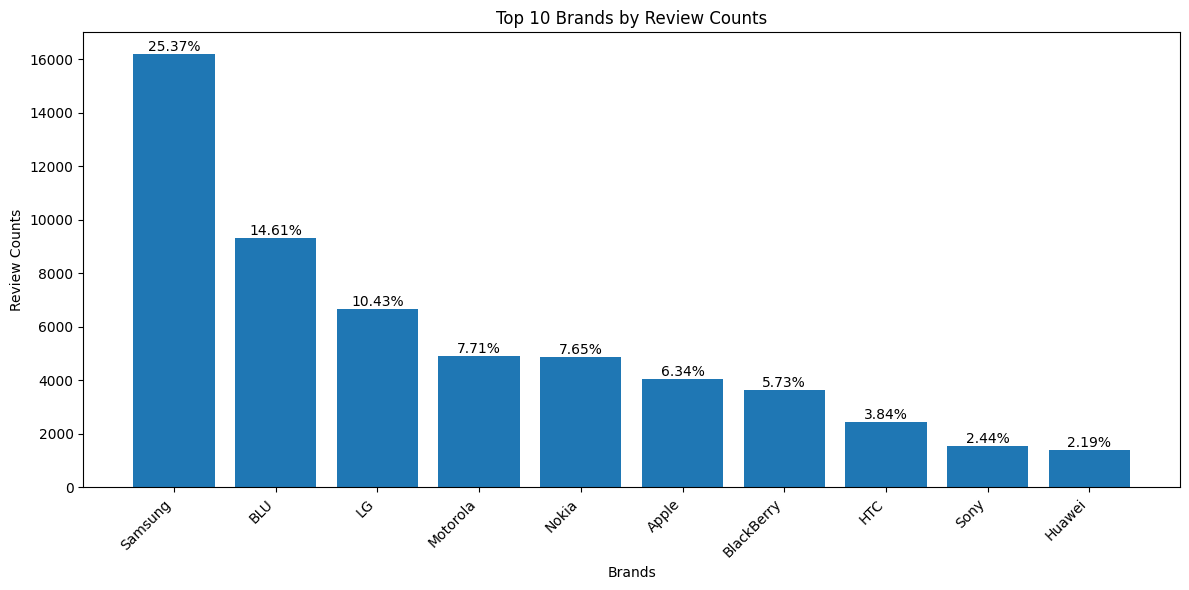

In [30]:
import matplotlib.pyplot as plt

# Assuming 'df_merged' is your DataFrame and it has columns 'brand' and 'review_sentiment'
top_10_brands = df_merged['brand'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_brands.index, top_10_brands.values)
plt.xlabel('Brands')
plt.ylabel('Review Counts')
plt.title('Top 10 Brands by Review Counts')
plt.xticks(rotation=45, ha='right')

# Annotate bars with percentages
total_reviews = len(df_merged)
for i, count in enumerate(top_10_brands):
    percentage = (count / total_reviews) * 100
    plt.annotate(f'{percentage:.2f}%', (i, count), ha='center', va='bottom')

plt.tight_layout()
plt.show()


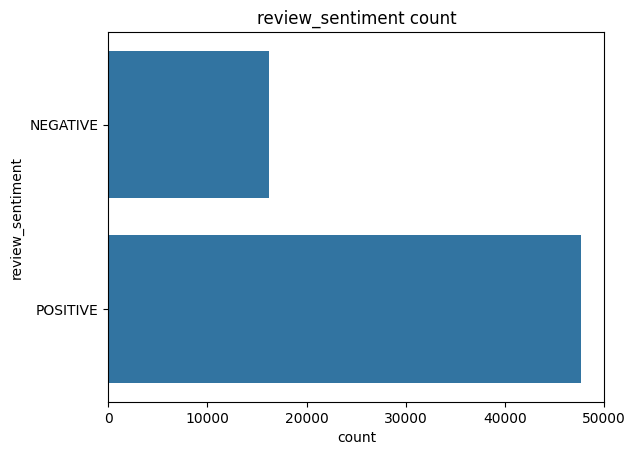

In [ ]:
# plotting to observe the distribution
plt.title('review_sentiment count')
sns.countplot(df_merged['review_sentiment'])
plt.show()

In [ ]:
# checking number of positive and negative reviews along with their percent share
neg  = pos_neg[1]
pos  = pos_neg[0]

print('Number of negative reviews: ', neg, end='\n')
print('Number of positive reviews: ', pos, end='\n')
print('Negative review rate is approx {0}%'.format(round((neg/float(pos+neg))*100), 2),end='\n')
print('positve review rate is approx {0}%'.format(round((pos/float(pos+neg))*100), 2))

Number of negative reviews:  16157
Number of positive reviews:  47677
Negative review rate is approx 25%
positve review rate is approx 75%


Data is very much imbalance and it is more in favour of positive

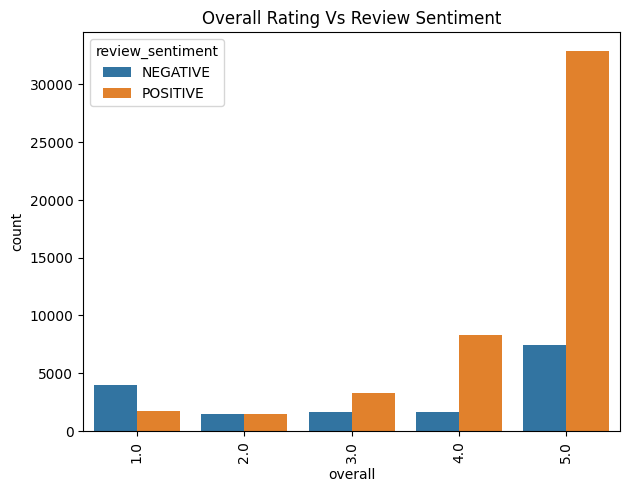

In [ ]:
# let us analyse positive and negative reviews distributed along the ratings
plt.figure()
sns.countplot(data=df_merged, x=df_merged['overall'], hue=df_merged['review_sentiment'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Overall Rating Vs Review Sentiment')
plt.show()

From the above plot, everything seems to be normal. As expected, most of the positive reviews have higher rating and negative reviews have lower rating.

In [16]:
import plotly.express as px

# Group by brand and calculate the average rating and the count of reviews
brand_ratings = df_merged.groupby('brand')['overall'].agg(['mean', 'count'])

# Sort by the number of reviews (count) in descending order and take the top N brands
top_brands = brand_ratings.sort_values('count', ascending=False).head(10) # Adjust 10 to desired number of top brands

# Create the Plotly bar chart
fig = px.bar(top_brands,
             y=top_brands.index,
             x ='mean', color = 'mean',
             title='Average Ratings of Top Reviewed Brands',
             labels={'x': 'Brand', 'y': 'Average Rating'},
             text='mean')  # Show the average rating on top of each bar
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside') # Format the displayed text to 2 decimal places
fig.show()


In [ ]:
# lets observe top 10 brands by review counts
df_merged['brand'].value_counts()[:10]

,count
brand,
Samsung,16193
BLU,9326
LG,6657
Motorola,4922
Nokia,4885
Apple,4049
BlackBerry,3656
HTC,2453
Sony,1556


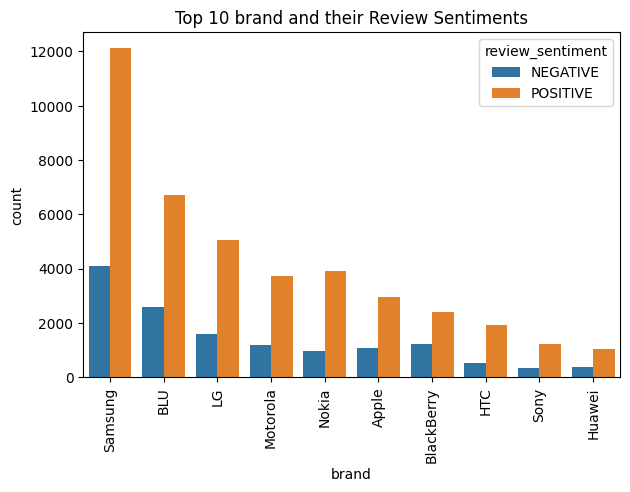

In [ ]:
plt.figure()
sns.countplot(data=df_merged, x=df_merged['brand'], hue=df_merged['review_sentiment'], order=df_merged['brand'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Top 10 brand and their Review Sentiments')
plt.show()

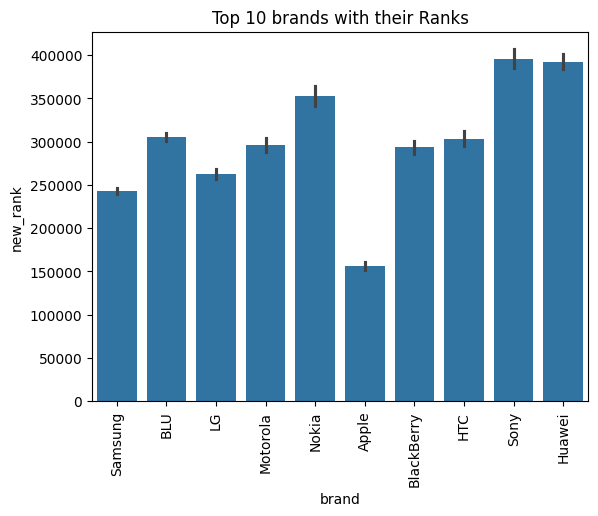

In [ ]:
# top 10 brands with their ranks in cellphone category
plt.figure()
sns.barplot(data=df_merged, x=df_merged['brand'], y=df_merged['new_rank'], order=df_merged['brand'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.title("Top 10 brands with their Ranks")
plt.show()

In [ ]:
#Let us now analyse the verified reviews
df_merged["verified"].value_counts()

,count
verified,
True,54990
False,8844


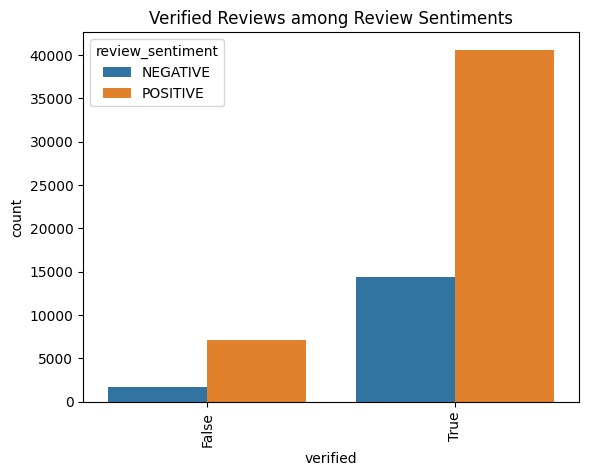

In [ ]:
plt.figure()
sns.countplot(data=df_merged, x=df_merged['verified'], hue=df_merged['review_sentiment'])
plt.xticks(rotation=90)
plt.title('Verified Reviews among Review Sentiments')
plt.show()

So, majority of the reviews are verified

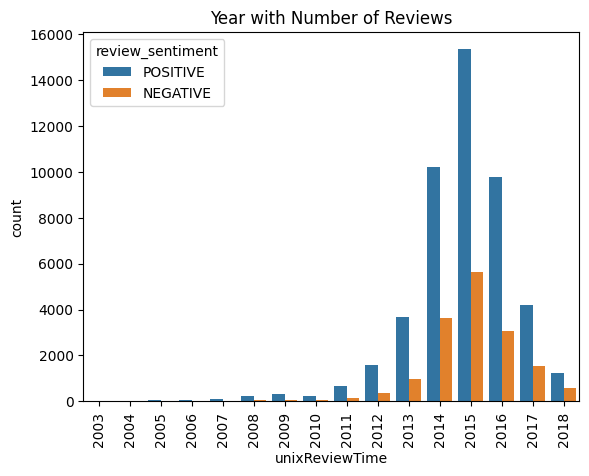

In [ ]:
# observing reviews accumilated over the years
plt.figure()
# Assuming 'unixReviewTime' is the column with date and time information
sns.countplot(data=df_merged, x=pd.DatetimeIndex(df_merged['unixReviewTime']).year, hue=df_merged['review_sentiment'])
plt.xticks(rotation=90)
plt.title("Year with Number of Reviews")
plt.show()

Most of the reviews are between 2014-2016, the trend increased until this period and reduced post that.

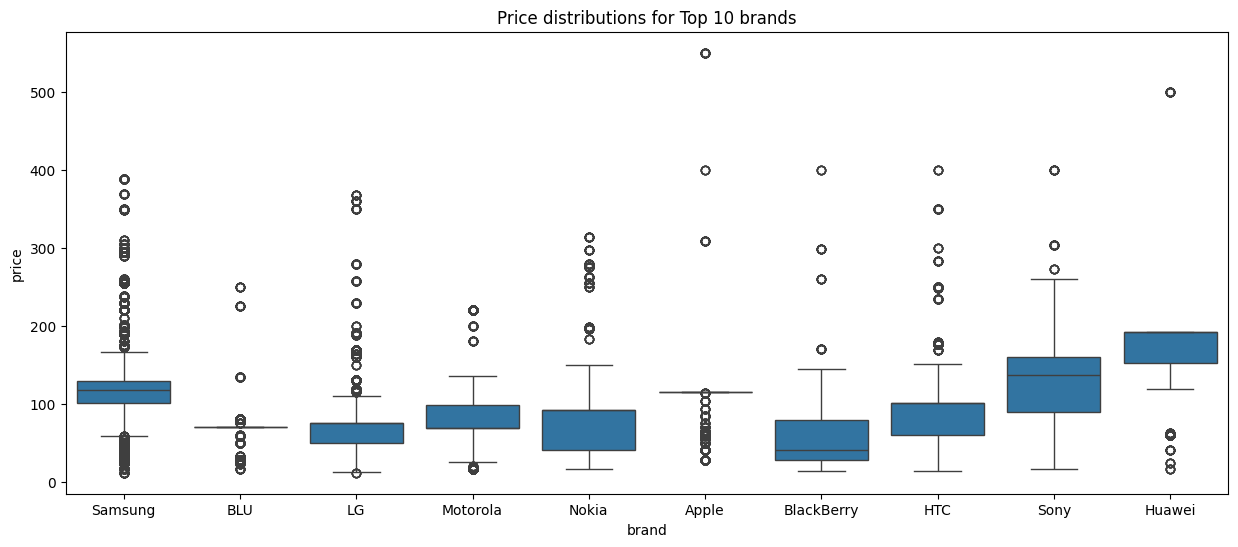

In [ ]:
# top 10 brands along with their price distribution
plt.figure(figsize=[15,6])
plt.title("Price distributions for Top 10 brands")
sns.boxplot(data=df_merged, x='brand', y='price', order=df_merged['brand'].value_counts().iloc[:10].index)
plt.show()

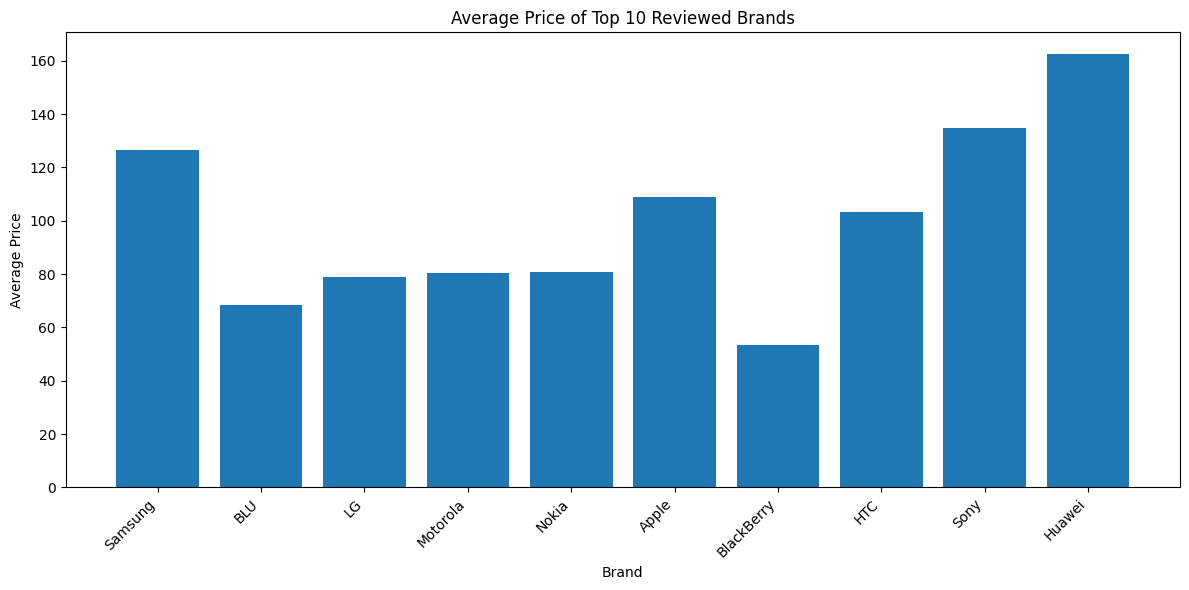

In [32]:
import matplotlib.pyplot as plt

# Assuming 'df_merged' is your DataFrame and it has columns 'brand', 'price'
top_10_brands = df_merged['brand'].value_counts().nlargest(10).index

average_prices = {}
for brand in top_10_brands:
    average_prices[brand] = df_merged[df_merged['brand'] == brand]['price'].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_prices.keys(), average_prices.values())
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.title("Average Price of Top 10 Reviewed Brands")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


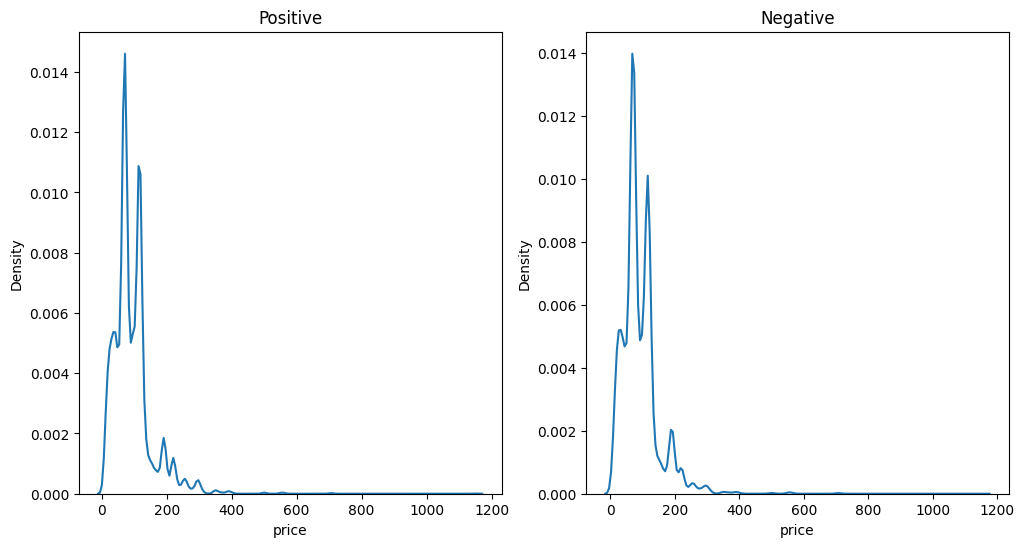

In [ ]:
# price wise distribution for review sentiments
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(1, 2, 1, title='Positive')
ax2 = fig.add_subplot(1, 2, 2, title='Negative')

sns.kdeplot(df_merged[df_merged['review_sentiment'] == 'POSITIVE']['price'], ax=ax1)
sns.kdeplot(df_merged[df_merged['review_sentiment'] == 'NEGATIVE']['price'], ax=ax2)

plt.show()

## Preprocessing the text data

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63834 entries, 0 to 63833
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        63834 non-null  int64  
 1   overall           63834 non-null  float64
 2   verified          63834 non-null  bool   
 3   reviewerID        63834 non-null  object 
 4   asin              63834 non-null  object 
 5   reviewerName      63825 non-null  object 
 6   reviewText        63834 non-null  object 
 7   summary           63817 non-null  object 
 8   unixReviewTime    63834 non-null  object 
 9   vote              63834 non-null  object 
 10  review_sentiment  63834 non-null  object 
 11  description       63834 non-null  object 
 12  title             63834 non-null  object 
 13  also_buy          63834 non-null  object 
 14  brand             63768 non-null  object 
 15  feature           63834 non-null  object 
 16  details           63834 non-null  object

In [ ]:
# mapping labels to 0 and 1
df_merged['review_sentiment'] = df_merged.review_sentiment.map({'POSITIVE':1, 'NEGATIVE':0})
df_merged.head()

,Unnamed: 0,overall,verified,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,title,also_buy,brand,feature,details,price,new_category,new_rank,also_view_new,also_view_brand
0,0,1.0,False,A5JLAU2ARJ0BO,B0000E3GWH,Old-and-Wise,This phone is ugly and heavy and has a terribl...,Bad reception,2004-09-21,2.0,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
1,1,4.0,False,A1ACM1CBGORBN1,B0000E3GWH,Sherry Berry,I had the Samsung V205 and then I decided to t...,Pretty good phone.. an improvement from my v205,2004-07-24,15.0,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
2,2,3.0,False,A2V48Q03FZUOSD,B0000E3GWH,Benjamin David,This is the first Samsung phone I have had and...,Not as user friendly as the Motorola V300-,2004-07-06,11.0,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
3,3,5.0,True,A1V3TRGWOMA8LC,B0000E3GWH,James Beswick,"..and I'm from Europe, where the phones and ne...",The best phone I've ever owned,2004-04-12,4.0,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]
4,4,3.0,False,A3NOBH42C7UI5M,B0000E3GWH,Kepela,This phone is amazingly small and light for a ...,I love the phone but it has some real problems,2004-02-19,12.0,...,Samsung SGH E715 - Titanium blue (T-Mobile) Ce...,[],Samsung,[],{},117.247465,Cell Phones,3059436.0,[''],[]


In [ ]:
# extracting reviews and their sentiments
df_reviews = df_merged[["reviewText","review_sentiment"]]
df_reviews.head()

,reviewText,review_sentiment
0,This phone is ugly and heavy and has a terribl...,0
1,I had the Samsung V205 and then I decided to t...,1
2,This is the first Samsung phone I have had and...,0
3,"..and I'm from Europe, where the phones and ne...",1
4,This phone is amazingly small and light for a ...,1


### Lower Casing

In [ ]:
df_reviews['reviewText']= df_reviews['reviewText'].str.lower()

### Remove HTML Tags

re.compile('<.*?>'):

Purpose: Compiles a regular expression pattern into a RegexObject for better performance (especially if you intend to use the same pattern multiple times). Pattern <.?>: <: Matches the opening < character of a tag. .?: Matches any sequence of characters (.*) in a non-greedy (lazy) manner. The ? ensures it stops matching at the first >, not the last one in the string.>: Matches the closing > character of a tag.

pattern.sub(r'', text):

pattern.sub(replacement, text): Replaces all occurrences of the compiled pattern in the text with the specified replacement. r'': Specifies the replacement string as empty (i.e., removes the matched content). text: The input string from which HTML/XML tags need to be removed.

In [ ]:
import re

# Function to remove HTML tags
def remove_html_tags(text):
    if not isinstance(text, str):  # Check if the input is not a string
        text = str(text)  # Convert non-string values to strings
    pattern = re.compile('<.*?>')
    return pattern.sub(r'', text)

# Ensure all values in 'text' are strings, replacing NaN with an empty string
df_reviews['reviewText'] = df_reviews['reviewText'].fillna('').astype(str)

# Apply the function to the 'text' column
df_reviews['reviewText']= df_reviews['reviewText'].apply(remove_html_tags)

### Remove URLs

https?://\S+: Matches URLs that begin with http:// or https:// followed by one or more non-whitespace characters. |: Allows an alternate match. www.\S+: Matches URLs that start with www. followed by one or more non-whitespace characters.

In [ ]:
def remove_url(text):
    pattern = re.compile(r'https?://\S+|www.\.\S+')
    return pattern.sub(r'', text)

In [ ]:
df_reviews['reviewText']=df_reviews['reviewText'].apply(remove_url)

### Remove Punctuaton

In [ ]:
import string,time
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punc1(text):
    return text.translate(str.maketrans('','',string.punctuation))

In [ ]:
df_reviews['reviewText']=df_reviews['reviewText'].apply(remove_punc1)

### Removing Stop Words

In [ ]:
# remove contractions and make them as normal strings
contractionsMain = {"ain't": "is not", "aren't": "are not","can't": "can not", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

def getcontractions(contractionsMain):
    contraction_key = re.compile('(%s)' % '|'.join(contractionsMain.keys()))
    return contractionsMain, contraction_key

contractions, contraction_key = getcontractions(contractionsMain)
def replacecontractions(text):
    def replace(match):
        return contractions[match.group(0)]
    return contraction_key.sub(replace, text)

In [ ]:
df_reviews['reviewText']=df_reviews['reviewText'].apply(replacecontractions)

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))
print(len(stopwords.words('english')))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
def remove_stopwords(text):
    new_text = []

    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    x = new_text[:]
    new_text.clear()
    return " ".join(x)

In [ ]:
df_reviews['reviewText']=df_reviews['reviewText'].apply(remove_stopwords)

### Handling Emojis

- If we have emojis in the text, we have two options:
  - Removing Emojis. (OR)
  - Replacing emojis in the form of text.

In [ ]:
import re
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               "u\U0001F600-\U0001F64F"  # Emotions
                               "u\U0001F300-\U0001F5FF"  # Symbols & pictographs
                               "u\U0001F680-\U0001F6FF"  # Transport & map symbols
                               "u\U0001F1E0-\U0001F1FF"  # Flags(iOS)
                               "u\U00002702-\U000027B0"
                               "u\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df_reviews['reviewText']=df_reviews['reviewText'].apply(remove_emoji)

In [ ]:
df_reviews

,reviewText,review_sentiment
0,phone gly heavy terrible ser interface e...,0
1,samsng v205 decided try e715 fyi peo...,1
2,first samsng phone qite measrep v3...,0
3,im erope phones networks mch better s...,1
4,phone amazingly small light camera phone ...,1
...,...,...
63829,price,0
63830,awesome thanks love,1
63831,work fantastic havent isses since receiv...,1
63832,8 9 months seless get paid aj,0


In [ ]:
df_reviews['reviewText'].loc[0]

' phone  gly  heavy    terrible ser interface even  techies like   also drops calls like crazy   manhattan  moto v600   mch better phone takes better pictres gives  better clarity  reception  smaller   mch mch cheaper get  moto v600   want tmobile stay away   gly monster'

### Replacing characters which are appearing for more than twice

In [ ]:
# replacing characters which are appearing for more than twice in any word into single character
def replace_multiple_characters(text):
        repeat_pattern = re.compile(r'(\w)\1{2,}')
        match_substitution = r'\1\1'
        new_word = repeat_pattern.sub(match_substitution,text)
        repeat_pattern1 = re.compile(r'(\w)\1{1,}$')
        match_substitution1 = r'\1'
        new_word = repeat_pattern1.sub(match_substitution1,new_word)
        return new_word


In [ ]:
df_reviews['reviewText']=df_reviews['reviewText'].apply(replace_multiple_characters)

### Stemming & lemmatization

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
# Stemming
stemmer = PorterStemmer()
def stem_words(text):
  return " ".join([stemmer.stem(word) for word in text.split()])
df_reviews['reviewText'] = df_reviews['reviewText'].apply(stem_words)

In [ ]:
# Stemming
#stemmer = PorterStemmer()
#def stem_words(text):
#  return " ".join([stemmer.stem(word) for word in text.split()])
#df_reviews['reviewText'] = df_reviews['reviewText'].apply(stem_words)


# Lemmatization
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word, pos = "v") for word in text.split()])
df_reviews['reviewText'] = df_reviews['reviewText'].apply(lemmatize_words)


In [ ]:
# prompt: Remove digits from the data

import re

def remove_digits(text):
    return re.sub(r'\d+', '', text)

# Assuming df_reviews is your DataFrame and 'reviewText' is the column
df_reviews['reviewText'] = df_reviews['reviewText'].apply(remove_digits)


In [ ]:

# converting into X and y
X = df_reviews.reviewText
y = df_reviews.review_sentiment
print(X.shape)
print(y.shape)

(63834,)
(63834,)


In [ ]:
# splitting for test and train data
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
X_train.head()

,reviewText
32152,excelent
2861,nice
27354,great phone freez iss thogh
12718,month ago by awesom phone soft key lead stop ...
36013,phone wont power lot app cle sck bigtim gess i...


In [ ]:
y_train.head()

,review_sentiment
32152,0
2861,1
27354,1
12718,1
36013,0


In [1]:
# vectorizing the reviews [Bag of Word]
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()


In [ ]:

vect.fit(X_train)

CountVectorizer()

In [ ]:

# printing the vocabulary
vect.vocabulary_

{'excelent': 9120,
 'nice': 18857,
 'great': 11776,
 'phone': 21566,
 'freez': 10692,
 'iss': 14277,
 'thogh': 29861,
 'month': 17746,
 'ago': 529,
 'by': 3854,
 'awesom': 2010,
 'soft': 27558,
 'key': 14835,
 'lead': 15315,
 'stop': 28605,
 'work': 32505,
 'toch': 30211,
 'screen': 25779,
 'dead': 6771,
 'spot': 28110,
 'figr': 9878,
 'ill': 13345,
 'send': 26174,
 'back': 2071,
 'theyll': 29711,
 'fix': 10077,
 'nope': 19427,
 'go': 11414,
 'littl': 15746,
 'week': 31863,
 'get': 11122,
 'still': 28556,
 'break': 3554,
 'batteri': 2346,
 'compart': 5501,
 'that': 29528,
 'miss': 17402,
 'paint': 20869,
 'samsng': 25338,
 'chip': 4872,
 'appar': 1359,
 'disassembl': 7507,
 'provid': 23336,
 'cstomer': 6436,
 'servic': 26308,
 'say': 25481,
 'ber': 2691,
 'beyond': 2789,
 'econom': 8287,
 'repair': 24501,
 'gross': 11922,
 'electromech': 8430,
 'damageabs': 6574,
 'hh': 12634,
 'realli': 23968,
 'also': 818,
 'pad': 20825,
 'lift': 15567,
 'insid': 13841,
 'im': 13364,
 'gess': 11115,


In [ ]:

# size of the vocabulary
len(vect.vocabulary_.keys())

33165

In [ ]:
# Transform the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [ ]:

print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 9120)	1
  (1, 18857)	1
  (2, 10692)	1
  (2, 11776)	1
  (2, 14277)	1
  (2, 21566)	1
  (2, 29861)	1
  (3, 73)	1
  (3, 373)	1
  (3, 529)	1
  (3, 818)	2
  (3, 858)	1
  (3, 1280)	1
  (3, 1359)	1
  (3, 1382)	2
  (3, 1935)	1
  (3, 2010)	2
  (3, 2071)	3
  (3, 2148)	1
  (3, 2346)	1
  (3, 2691)	2
  (3, 2743)	1
  (3, 2782)	1
  (3, 2789)	2
  (3, 3048)	1
  :	:
  (47870, 27739)	1
  (47870, 30006)	1
  (47870, 32505)	1
  (47870, 32802)	1
  (47871, 9120)	1
  (47872, 21566)	1
  (47872, 25744)	1
  (47873, 3982)	1
  (47873, 8470)	1
  (47873, 9041)	1
  (47873, 11776)	2
  (47873, 13472)	1
  (47873, 18540)	1
  (47873, 20646)	1
  (47873, 21566)	1
  (47873, 23509)	1
  (47873, 29744)	1
  (47873, 29763)	1
  (47874, 4854)	1
  (47874, 7920)	1
  (47874, 9917)	1
  (47874, 13247)	1
  (47874, 13813)	1
  (47874, 16986)	1
  (47874, 23145)	1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_transformed,y_train)
print("Logistic Regression train score: ",lr.score(X_train_transformed,y_train))
print("Logistic Regression score: ",lr.score(X_test_transformed,y_test))

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_transformed,y_train)
print("Naive Bayes train score: ",nb.score(X_train_transformed,y_train))
print("Naive Bayes score: ",nb.score(X_test_transformed,y_test))

# Linear SVC
svc = LinearSVC()
svc.fit(X_train_transformed,y_train)
print("Linear SVC train score: ",svc.score(X_train_transformed,y_train))
print("Linear SVC score: ",svc.score(X_test_transformed,y_test))


Logistic Regression train score:  0.9552584856396867
Logistic Regression score:  0.9241807130772605
Naive Bayes train score:  0.8605117493472585
Naive Bayes score:  0.8472961965035404
Linear SVC train score:  0.967644908616188
Linear SVC score:  0.9164108026818722


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train)
print("Random Forest train score: ", rf.score(X_train_transformed, y_train))
print("Random Forest score: ", rf.score(X_test_transformed, y_test))

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_transformed, y_train)
print("Decision Tree train score: ", dt.score(X_train_transformed, y_train))
print("Decision Tree score: ", dt.score(X_test_transformed, y_test))




In [ ]:
# prompt: AUC cure

from sklearn.metrics import roc_auc_score

# Assuming 'lr', 'nb', 'svc', 'rf', and 'dt' are your trained models
# and X_test_transformed and y_test are your test data

# Calculate AUC for Logistic Regression
y_pred_proba_lr = lr.predict_proba(X_test_transformed)[:, 1]
auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"AUC for Logistic Regression: {auc_lr}")

# Calculate AUC for Naive Bayes
y_pred_proba_nb = nb.predict_proba(X_test_transformed)[:, 1]
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)
print(f"AUC for Naive Bayes: {auc_nb}")


# Calculate AUC for Linear SVC (LinearSVC doesn't provide probabilities directly)
# You need to use a calibrated classifier or a different method to get probabilities
# Here's an example using `CalibratedClassifierCV`
from sklearn.calibration import CalibratedClassifierCV
svc_calibrated = CalibratedClassifierCV(svc, method="sigmoid") # or "isotonic"
svc_calibrated.fit(X_train_transformed, y_train)
y_pred_proba_svc = svc_calibrated.predict_proba(X_test_transformed)[:,1]
auc_svc = roc_auc_score(y_test, y_pred_proba_svc)
print(f"AUC for Linear SVC: {auc_svc}")


# Calculate AUC for Random Forest
y_pred_proba_rf = rf.predict_proba(X_test_transformed)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print(f"AUC for Random Forest: {auc_rf}")

# Calculate AUC for Decision Tree
y_pred_proba_dt = dt.predict_proba(X_test_transformed)[:, 1]
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print(f"AUC for Decision Tree: {auc_dt}")


AUC for Logistic Regression: 0.9541609675218341
AUC for Naive Bayes: 0.8720629143646494
AUC for Linear SVC: 0.9471843322097676
AUC for Random Forest: 0.9571424479928147
AUC for Decision Tree: 0.8645398067421924


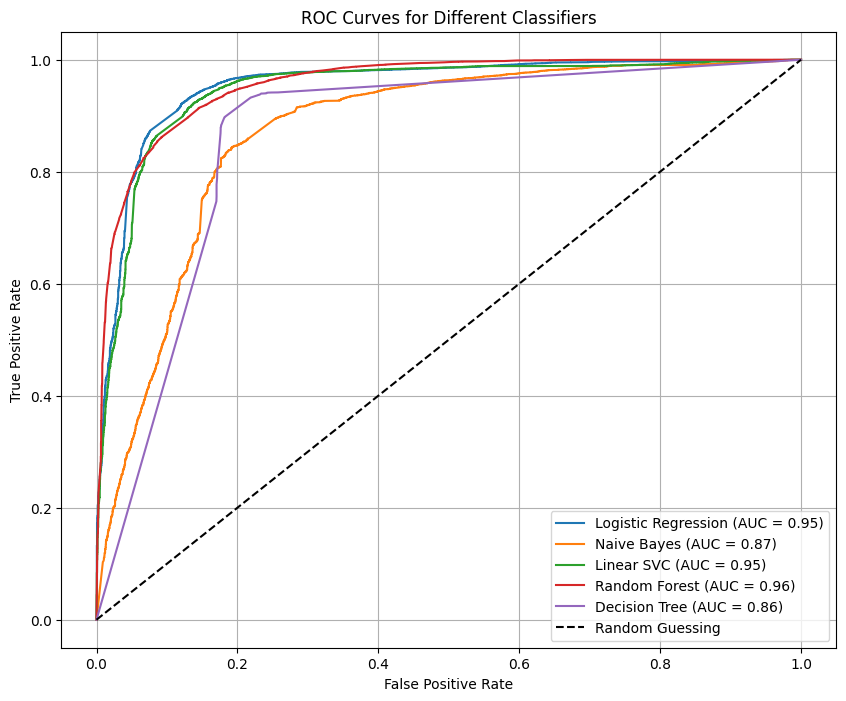

In [ ]:
# prompt: roc and auc curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'lr', 'nb', 'svc_calibrated', 'rf', and 'dt' are your trained models
# and X_test_transformed and y_test are your test data

# Calculate ROC curve and AUC for each model
models = {
    'Logistic Regression': (lr, y_pred_proba_lr),
    'Naive Bayes': (nb, y_pred_proba_nb),
    'Linear SVC': (svc_calibrated, y_pred_proba_svc),
    'Random Forest': (rf, y_pred_proba_rf),
    'Decision Tree': (dt, y_pred_proba_dt)
}


plt.figure(figsize=(10, 8))

for model_name, (model, y_pred_proba) in models.items():
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Classifiers')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85      4102
           1       0.94      0.96      0.95     11857

    accuracy                           0.92     15959
   macro avg       0.91      0.89      0.90     15959
weighted avg       0.92      0.92      0.92     15959



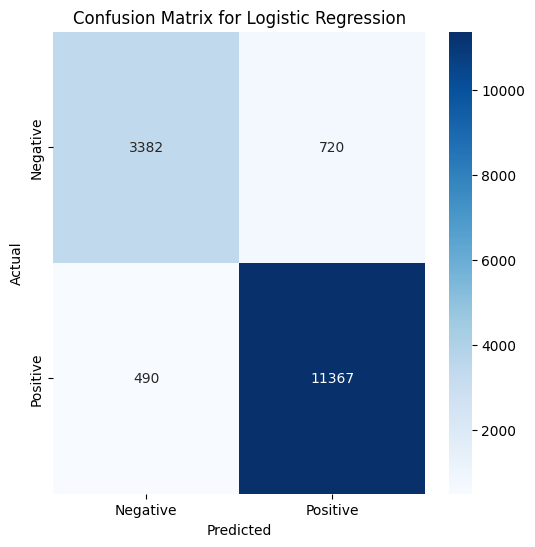


Classification Report for Naive Bayes:
               precision    recall  f1-score   support

           0       0.82      0.52      0.64      4102
           1       0.85      0.96      0.90     11857

    accuracy                           0.85     15959
   macro avg       0.84      0.74      0.77     15959
weighted avg       0.84      0.85      0.83     15959



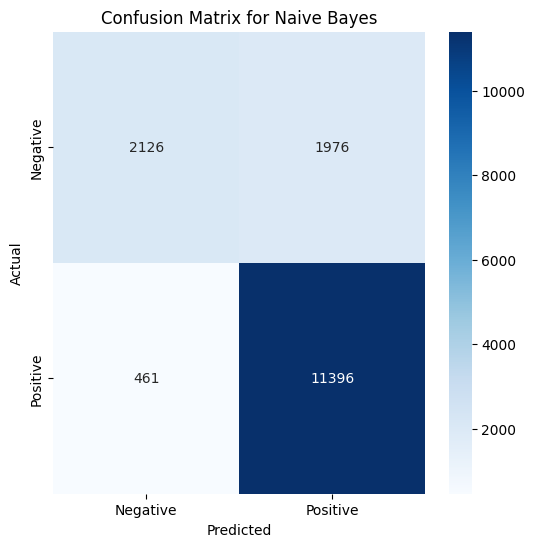


Classification Report for Linear SVC:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      4102
           1       0.93      0.96      0.95     11857

    accuracy                           0.92     15959
   macro avg       0.90      0.88      0.89     15959
weighted avg       0.92      0.92      0.92     15959



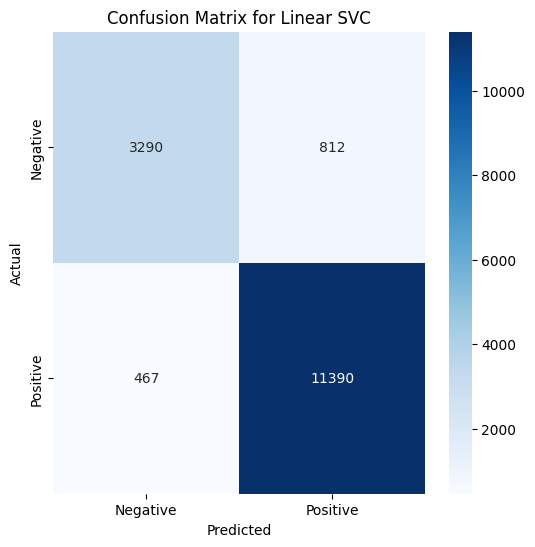


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      4102
           1       0.90      0.98      0.94     11857

    accuracy                           0.90     15959
   macro avg       0.91      0.83      0.86     15959
weighted avg       0.90      0.90      0.90     15959



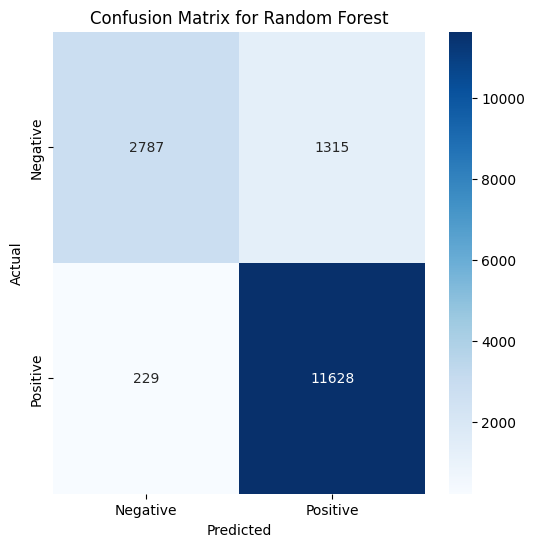


Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79      4102
           1       0.92      0.94      0.93     11857

    accuracy                           0.89     15959
   macro avg       0.87      0.85      0.86     15959
weighted avg       0.89      0.89      0.89     15959



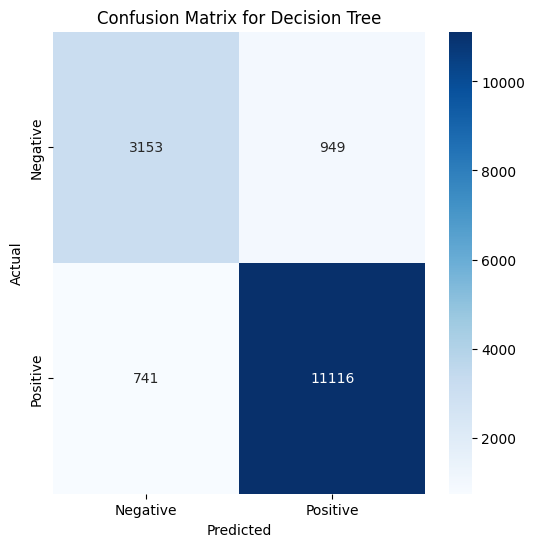

In [ ]:
# prompt: confusion metrics

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Assuming 'lr', 'nb', 'svc_calibrated', 'rf', and 'dt' are your trained models
# and X_test_transformed and y_test are your test data

models = {
    'Logistic Regression': lr,
    'Naive Bayes': nb,
    'Linear SVC': svc_calibrated,
    'Random Forest': rf,
    'Decision Tree': dt
}

for model_name, model in models.items():
    y_pred = model.predict(X_test_transformed)
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
import re
import string
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# ... (rest of your existing code) ...

def preprocess_review(review):
    # Lower Casing
    review = review.lower()

    # Remove HTML Tags
    pattern = re.compile('<.*?>')
    review = pattern.sub(r'', review)

    # Remove URLs
    pattern = re.compile(r'https?://\S+|www.\.\S+')
    review = pattern.sub(r'', review)

    # Remove Punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))

    # Remove Stop Words
    new_text = []
    for word in review.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word)
    review = " ".join(new_text)

    # Remove Emojis (you can customize this)
    emoji_pattern = re.compile("["
                               "u\U0001F600-\U0001F64F"
                               "u\U0001F300-\U0001F5FF"
                               "u\U0001F680-\U0001F6FF"
                               "u\U0001F1E0-\U0001F1FF"
                               "u\U00002702-\U000027B0"
                               "u\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    review = emoji_pattern.sub(r'', review)

    # Replace multiple characters
    repeat_pattern = re.compile(r'(\w)\1{2,}')
    match_substitution = r'\1\1'
    review = repeat_pattern.sub(match_substitution, review)
    repeat_pattern1 = re.compile(r'(\w)\1{1,}$')
    match_substitution1 = r'\1'
    review = repeat_pattern1.sub(match_substitution1, review)

    # Stemming
    stemmer = PorterStemmer()
    review = " ".join([stemmer.stem(word) for word in review.split()])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    review = " ".join([lemmatizer.lemmatize(word, pos="v") for word in review.split()])

    #Remove Digits
    review = re.sub(r'\d+', '', review)

    return review

# Example Usage (assuming you have your trained model 'lr' and vectorizer 'vect')
user_review = input("Enter your review: ")
preprocessed_review = preprocess_review(user_review)
review_transformed = vect.transform([preprocessed_review])  # Transform using the fitted vectorizer
prediction = lr.predict(review_transformed)

if prediction[0] == 1:
    print("Positive review")
else:
    print("Negative review")


Enter your review: wow what a great phone
Positive review
